# Ch02.07. Seborn 실습 - fmri 데이터


---
* 날짜: 2022.04.19
* 이름: 윤태우

## 학습내용

    - pairplot을 이용해 모든 변수의 분포 및 관계를 시각화 한다.
    - relplot을 이용해 두 변수의 관계를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
fmri = sns.load_dataset('fmri')
fmri.head()
```

In [ ]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


#### | 데이터 기본 탐색

In [ ]:
fmri[fmri['subject']== 's13'].tail()

,subject,timepoint,event,region,signal
995,s13,1,cue,frontal,-0.010346
1016,s13,9,cue,frontal,-0.082955
1029,s13,8,cue,frontal,-0.070991
1040,s13,12,cue,frontal,-0.020686
1060,s13,7,cue,frontal,-0.029130


In [ ]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [ ]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [ ]:
fmri.subject.unique() # fmri['subjuct']의 카테고리 확인

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [ ]:
fmri.event.unique()  # fmri['event']의 카테고리 확인

array(['stim', 'cue'], dtype=object)

### (2) Pair plot

```
seaborn.pairplot(data, *, 
                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶
```

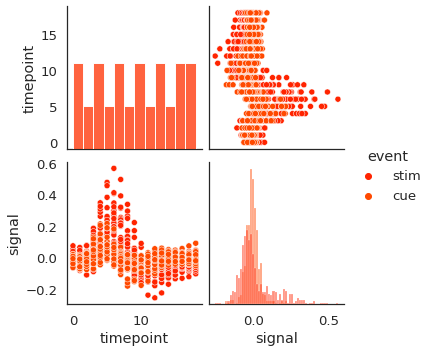

In [ ]:
sns.pairplot(data = fmri,      # 수치 자료형에 대해서만 상관플롯 및 분포를 그려준다.
             hue = 'event',    # (1,1),(2,2) 의 데이터들은 각 값들의 히스토그램, 나머지 둘은 시그널과 타임포인트의 산점도.
             diag_kind = 'hist',  # 대각선의 분포플롯 종류            ^ 플롯이 히스토그램일지 다른것일지 종류를 diag_kind = ''로 변경 가능.
             ) 
 # hue = 색깔을 나누는것 (처음엔 합쳐진 값대로 그래프가 나오지만 hue를 사용하면 서로 분리되서 나옴.)

### (3) Relational plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.relplot(x=None, y=None, 
                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)
```

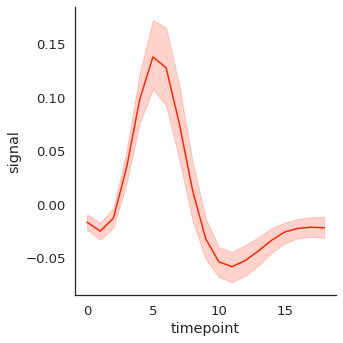

In [ ]:
sns.relplot(data = fmri, x = 'timepoint', y = 'signal',
            kind = 'line')

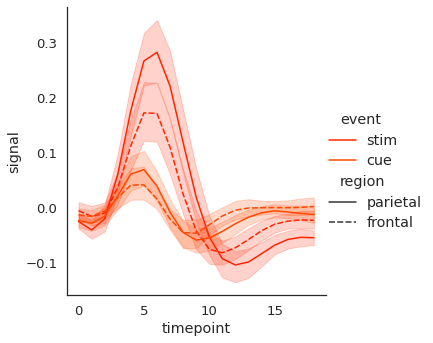

In [ ]:
sns.relplot(data = fmri, x = 'timepoint', y = 'signal',
            kind = 'line', hue = 'event',
            # size = 'region', #뇌 영역별로 굵기 분류
            style = 'region', #뇌 영역별로 선 스타일 분류
            )

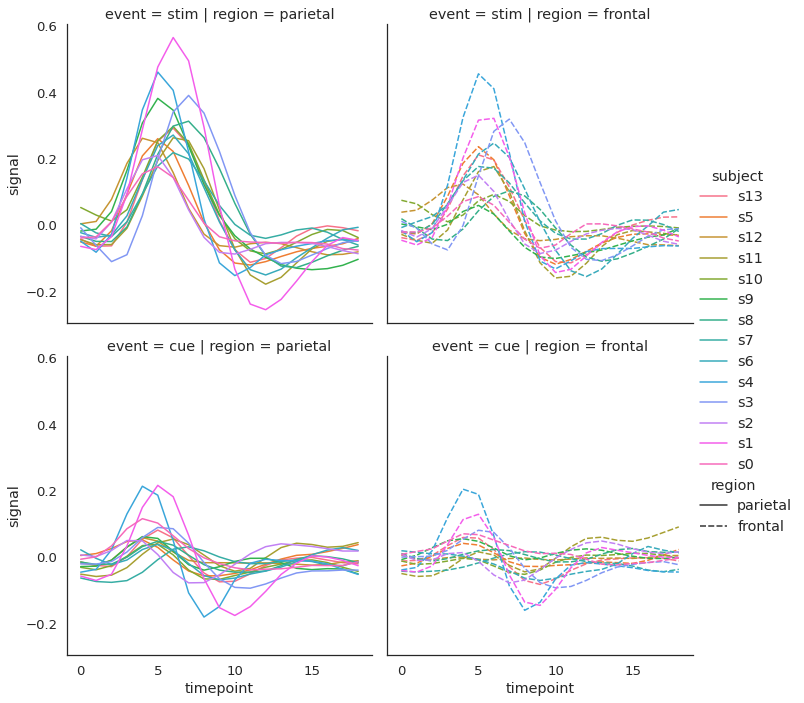

In [ ]:
# 실험자 별로 그래프 그리기
sns.relplot(data=fmri, x = 'timepoint', y = 'signal',
           hue = 'subject', kind = 'line',
            style = 'region',
            col = 'region', # 영역 별 플롯 따로 그리기(새로운 열)
            row = 'event')  # 이벤트별 플롯 따로 그리기(새로운 행)

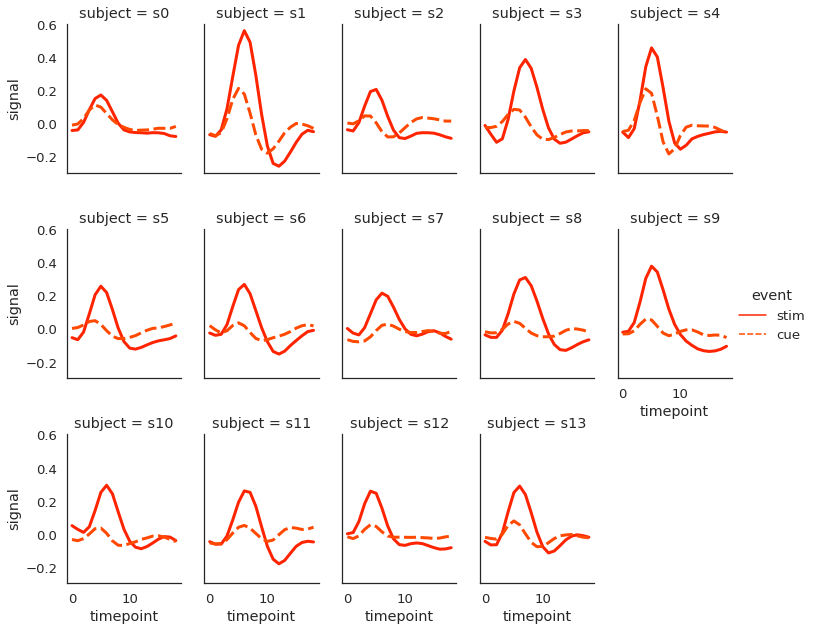

In [ ]:
# 참가자 별 별도의 플롯을 그려보자!!!
# region : frontal < pariental 만 사용!
# stim : 자극이 있을 때, 없을 때 비교

mask = fmri.region == 'parietal'
fmri_m = fmri[mask]

# fmri.query("region == 'frontal'") -> mask 쓴거랑 같음.

sns.relplot(data = fmri_m, x = 'timepoint', y = 'signal',
            hue = 'event', kind = 'line', col = 'subject',
            col_order = [f's{i}' for i in range(14)],    # 열 순서 지정
            col_wrap = 5,                                # 열 개수 조정
            aspect = 0.7,                                # 그림 가로 비율 조정
            height = 3,                                  # 그림 세로 사이즈 설정
            linewidth = 3,
            style = 'event') # 선 스타일을 이벤트로 구분


## **과제: flights**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-03.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("flights")
```

In [ ]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### (2) Pair plot

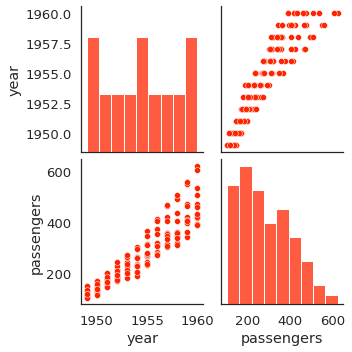

In [ ]:
sns.pairplot(data = df)

### (3) Relational plot

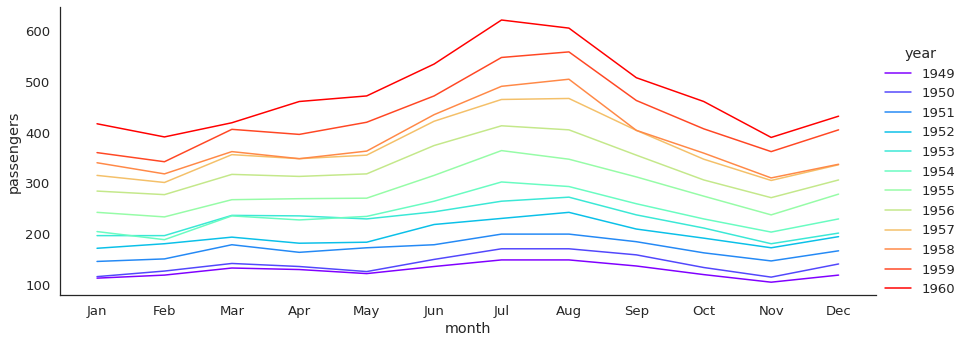

In [ ]:
sns.relplot(data = df, x = 'month', y = 'passengers',
             hue = 'year', kind = 'line',
            height = 5, aspect = 2.5,
            legend = 'full', palette = 'rainbow')


## **과제: [Response of neurons](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html)**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-02.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("dots")
```

In [ ]:
df = sns.load_dataset("dots")
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


#### | 데이터 기본 탐색


In [87]:
df['align'].unique()

array(['dots', 'sacc'], dtype=object)

### (2) Pair plot

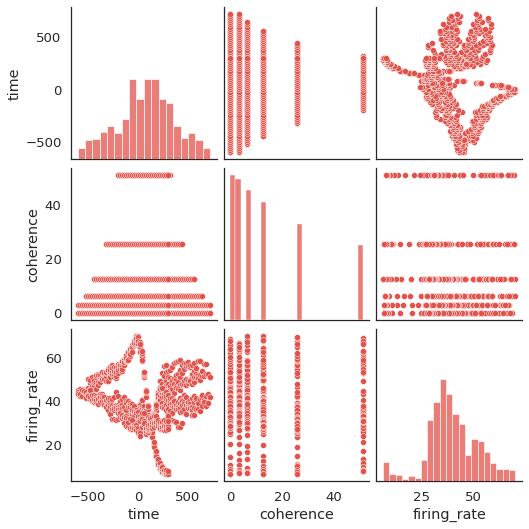

In [89]:
sns.pairplot(df)

### (3) Relational plot

Text(0.5, 1.0, 'align "dots" plot')

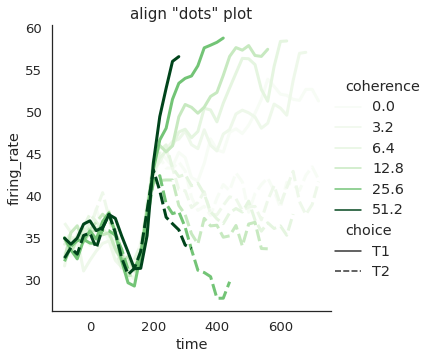

In [99]:
mask = df['align']=='dots'
df = df[mask]

sns.relplot(data = df, x='time',y='firing_rate', kind = 'line',
            hue = 'coherence', style = 'choice', palette = 'Greens',
            linewidth = 3)
plt.title('align "dots" plot', loc = 'center', fontsize = 15)